# Actividad para minimizar el impacto del sobre-ajuste a partir de la parada anticipada (Early Stopping).

## Etapa 1: Definición de los datos.

Antes de comenzar definimos la base de datos de interés. Usaremos la base de datos IMBD que consiste en reseñas hechas a 25000 películas. La tarea que configura esta base de datos consiste en predecir si el comentario es positivo o negativo. ([Ver enlace](https://keras.io/api/datasets/imdb/))

Se cargan las librerías necesarias

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt

Se carga la base de datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Se definen funciones para la visualización de la función de costo

In [3]:
def evaluate(model, history):
    # Se evalúa el accuracy del modelo tanto en el conjunto de entrenamiento como
    # en el de prueba.
    _, train_accuracy = model.evaluate(x_train, y_train)
    _, test_accuracy = model.evaluate(x_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    # Se grafica la función de costo para los conjuntos de entrenamiento y
    # prueba.
    plt.figure(figsize=(4, 3), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# Procesamiento de los datos.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train.shape

(25000, 10000)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Se definen los conjuntos de entrenamiento y prueba
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# Se define la red neuronal.

model = models.Sequential([
  layers.Dense(16, activation='relu', input_shape=(10000,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6996 - loss: 0.5935 - val_accuracy: 0.8079 - val_loss: 0.4414
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8913 - loss: 0.3383 - val_accuracy: 0.8818 - val_loss: 0.3127
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9245 - loss: 0.2374 - val_accuracy: 0.8881 - val_loss: 0.2831
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9398 - loss: 0.1895 - val_accuracy: 0.8848 - val_loss: 0.2883
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9495 - loss: 0.1589 - val_accuracy: 0.8848 - val_loss: 0.2827
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9607 - loss: 0.1307 - val_accuracy: 0.8867 - val_loss: 0.2909
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9647 - loss: 0.1161 - val_accuracy: 0.8734 - val_loss: 0.3289
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9748 - loss: 0.0944 - val_accuracy: 0.8831 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8987 - loss: 0.8369
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8496 - loss: 1.2222
Trainining accuracy: 0.95
Testing accuracy: 0.85


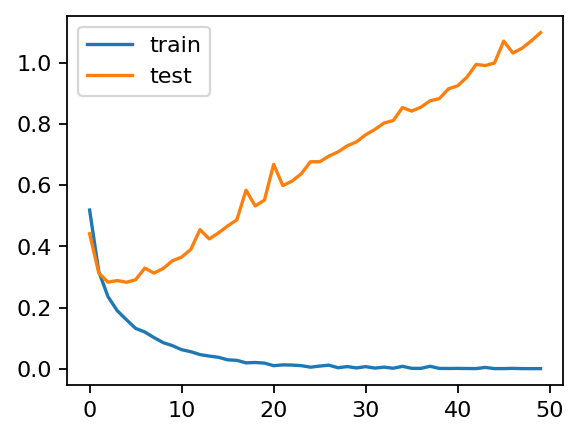

In [11]:
evaluate(model, history)

# Early Stopping.

Se modifica el proceso de optimización con el fin de realizar una parada temprana en el momento que se identifique la presencia del sobre-ajuste.

In [12]:
# Se define un callback que monitorea la función de costo sobre el conjunto de
# validación. El callback esperará un número "patience" de epochs, si no hay mejora
# en el loss, luego de cumplir el "patience", se interrumpe el ciclo de entrenamiento.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [13]:
# Se define el mismo modelo usado previamente.

model_1 = models.Sequential([
  layers.Dense(16, activation='relu', input_shape=(10000,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
  ])

In [14]:
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = [callback],)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6223 - loss: 0.6385 - val_accuracy: 0.8483 - val_loss: 0.4836
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8750 - loss: 0.4290 - val_accuracy: 0.8595 - val_loss: 0.3805
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9062 - loss: 0.3141 - val_accuracy: 0.8764 - val_loss: 0.3226
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9219 - loss: 0.2513 - val_accuracy: 0.8891 - val_loss: 0.2851
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9408 - loss: 0.1984 - val_accuracy: 0.8882 - val_loss: 0.2774
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9480 - loss: 0.1698 - val_accuracy: 0.8865 - val_loss: 0.2827
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9569 - loss: 0.1466 - val_accuracy: 0.8855 - val_loss: 0.2805


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9048 - loss: 0.2436
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8794 - loss: 0.2984
Trainining accuracy: 0.93
Testing accuracy: 0.88


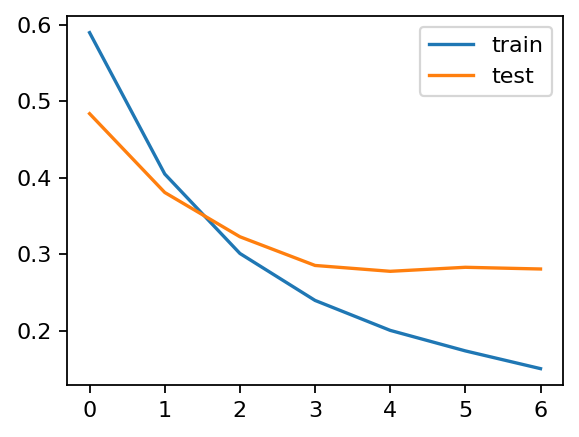

In [16]:
evaluate(model_1, history_1)